In [7]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train) ,(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

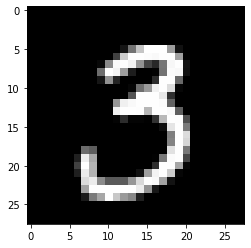

In [8]:
plt.imshow(X_test[90], cmap="gray")

In [9]:
y_test[90]

3

In [10]:
X = X_test.reshape(-1, 28*28)
y = y_test

In [12]:
X.shape

(10000, 784)

## Data preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_ = sc.fit_transform(X) # for u =0 and std = 1

In [16]:
X_.shape

(10000, 784)

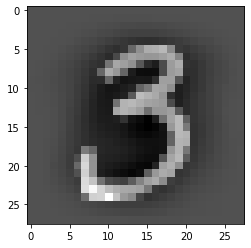

In [17]:
plt.imshow(X_[90].reshape(28,28), cmap = "gray")

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
Z_pca = pca.fit_transform(X_)

In [22]:
Z_pca.shape

(10000, 2)

In [23]:
X_ #in 784 dimensions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
Z_pca #in 2 dimensions

array([[-5.4582363 ,  6.41299396],
       [ 2.80450356, -8.03081637],
       [-7.41123198, -3.86393734],
       ...,
       [-5.00437241,  1.15424292],
       [-1.42098282, -4.42248363],
       [13.14273359, -4.26335806]])

In [25]:
pca.explained_variance_

array([41.39893397, 28.35105764])

This means we have lost 30% data (41+28)

## Custom PCA

In [26]:
import numpy as np

In [27]:
# Step-2 - Compute Covar matrix

In [28]:
 covar = np.dot(X_.T, X_)

In [30]:
covar.shape

(784, 784)

In [31]:
covar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Step -3 compute eign vectors using SVD 

In [32]:
from numpy.linalg import svd

In [34]:
U, S, V = svd(covar)

In [35]:
U.shape

(784, 784)

In [36]:
Ured = U[:, :2]

In [37]:
Ured.shape

(784, 2)

## Step 4 - Projection of Data on New axis (Components)

In [38]:
Z = np.dot(X_, Ured)

In [39]:
Z.shape

(10000, 2)

In [40]:
Z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

## Visulaise Dataset

In [41]:
import pandas as pd

In [44]:
new_dataset = np.hstack((Z, y.reshape(-1,1)))

In [45]:
dataframe = pd.DataFrame(new_dataset, columns=["PC-1", "PC-2", "label"])

In [46]:
dataframe.head()

,PC-1,PC-2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

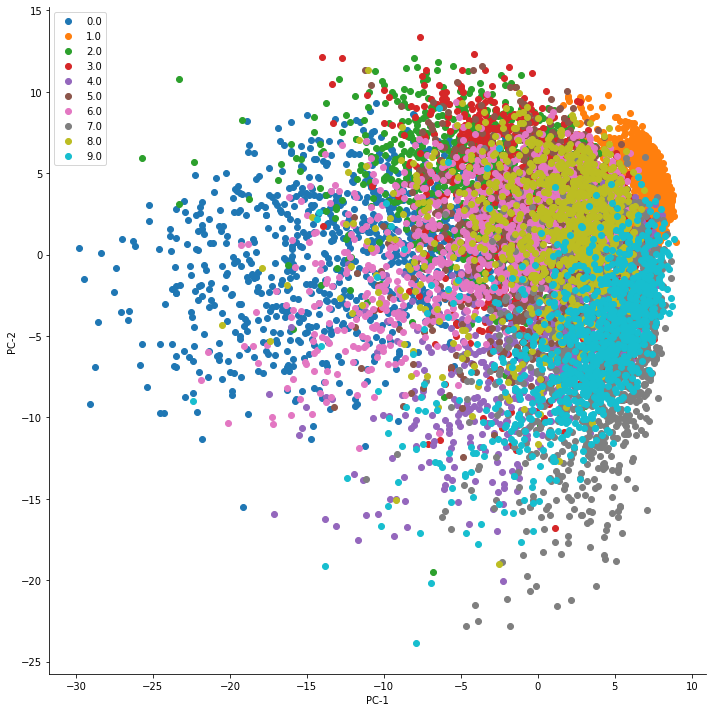

In [47]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue='label', height =10)
fg.map(plt.scatter, "PC-1", "PC-2")
plt.legend()
plt.show()

### PCA with 784 dimensions

In [48]:
pca = PCA()

In [50]:
Z_pca = pca.fit_transform(X_)

In [51]:
Z_pca.shape

(10000, 784)

In [52]:
pca.explained_variance_

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [53]:
pca.explained_variance_ratio_

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [56]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [57]:
cum_var_explained # gives cummulative sum of at each principal component

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

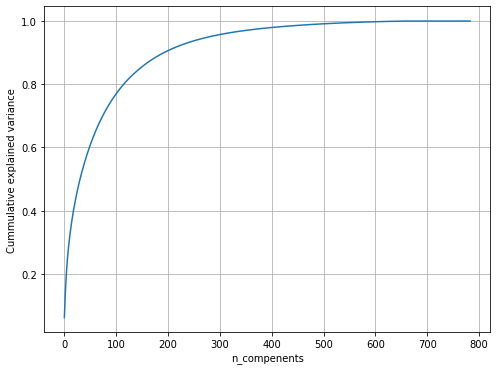

In [59]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_compenents")
plt.ylabel("Cummulative explained variance")
plt.show()

We can take 300 components and still get 90% variance